# MOwNiT 

# Laboratorium 5 - Aproksymacja funkcji ciągłej


## Wielomianowa aproksymacja średniokwadratowa

Celem wielomianowej aproksymacji średniokwadratowej $n$-tego stopnia funkcji $f$ ciągłej na przedziale $[a,b]$ jest znalezienie takiej kombinacji liniowej $W(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_0$ jednomianów $\{1,x,x^2,...,x^n\}$, aby$$\|W-f\|^2=\int_a^b(W(x)-f(x))^2dx$$była minimalna.

Wielomian najlepszej aproksymacji (a raczej jego współczynniki w kolejności od $a_n$ do $a_0$) znajduje funkcja `numpy.polyfit(x, y, deg)`

In [1]:
import numpy as np

#tworzenie punktów aproksymacji
x=np.linspace(0,3,20)
y=np.exp(x)

#wielomiany aproksymacyjne stopni 2,3,4
W2=np.polyfit(x,y,2)
W3=np.polyfit(x,y,3)
W4=np.polyfit(x,y,4)

In [2]:
print(W2,W3,W4)

[ 2.66353717 -2.2955281   1.82584423] [ 0.85441262 -1.18131961  2.20114374  0.84812165] [ 0.20833764 -0.39561322  1.1908604   0.70971996  1.0202036 ]


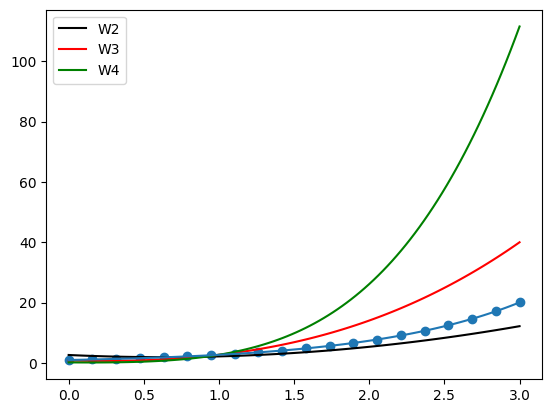

In [3]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

xp=np.linspace(0,3,100)

plt.plot(xp,Polynomial(W2)(xp),'k',label='W2')
plt.plot(xp,Polynomial(W3)(xp),'r',label='W3')
plt.plot(xp,Polynomial(W4)(xp),'g',label='W4')
plt.plot(xp,np.exp(xp))
plt.scatter(x,y)
plt.legend()
plt.show()

## Aproksymacja Czebyszewa

Inną rodziną ortogonalną w normie $L^2$ są *wielomiany Czebyszewa* $T_k(x)$. Definiuje się je rekurencyjnie
$$\begin{aligned}T_{0}(x)&=1,\\T_{1}(x)&=x,\\T_{k+1}(x)&=2x\,T_{k}(x)-T_{k-1}(x)\end{aligned}$$
lub wzorem jawnym
$$T_k(x)=\frac{(x+\sqrt{x^2-1})^k+(x-\sqrt{x^2-1})^k}{2}.$$

Pierwsze kilka wielomianów Czebyszewa:
$$\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{2}(x)&=2x^{2}-1\\T_{3}(x)&=4x^{3}-3x\\T_{4}(x)&=8x^{4}-8x^{2}+1\\T_{5}(x)&=16x^{5}-20x^{3}+5x\end{aligned}$$

Dowolną funkcję $f(x)$ ciągłą na przedziale $[a,b]$ możemy rozwinąć w *szereg Czebyszewa* $$f(x)\approx\sum_{i=0}^\infty c_iT_i(x),$$
a stąd otrzymujemy aproksymację Czebyszewa wielomianem zadanego stopnia $n$ $$f(x)\approx \sum_{i=0}^n c_iT_i(x).$$

W pythonie szereg Czebyszewa otrzymujemy funkcją `numpy.polynomial.chebyshev.Chebyshev(coef)` gdzie `coef` to tablica współczynników $c_i$ w kolejności od $c_0$.

In [4]:
from numpy.polynomial import chebyshev

chebyshev.Chebyshev([1,1,1])

Chebyshev([1., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Funkcja `polynomial.chebyshev.cheb2poly(c)` konwertuje szereg na wielomian.

In [5]:
chebyshev.cheb2poly([1,1,1])

array([0., 1., 2.])

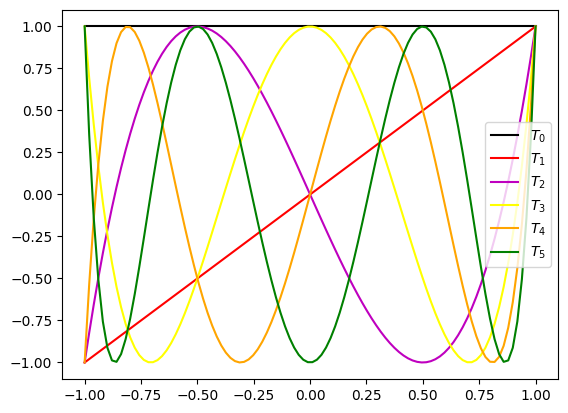

In [6]:
xp=np.linspace(-1,1,100)

plt.plot(xp,Polynomial(chebyshev.cheb2poly([1]))(xp),'k',label='$T_0$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,1]))(xp),'r',label='$T_1$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,1]))(xp),'m',label='$T_2$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,1]))(xp),'yellow',label='$T_3$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,0,1]))(xp),'orange',label='$T_4$')
plt.plot(xp,Polynomial(chebyshev.cheb2poly([0,0,0,0,0,0,1]))(xp),'g',label='$T_5$')
plt.legend()
plt.show()

Współczynniki aproksymacji wielomianami Czebyszewa otrzymujemy funkcją `polynomial.chebyshev.chebfit(x, y, deg)`.

In [7]:
#tworzenie punktów aproksymacji
x=np.linspace(0,3,20)
y=np.exp(x)

#współczynniki aproksymacji wielomianami Czebyszewa
coeff2=chebyshev.chebfit(x,y,2)
coeff3=chebyshev.chebfit(x,y,3)
coeff4=chebyshev.chebfit(x,y,4)
print(coeff2)
print(coeff3)
print(coeff4)

#współczynniki otrzymanych wielomianów aproksymacyjnych
C2=chebyshev.cheb2poly(coeff2)
C3=chebyshev.cheb2poly(coeff3)
C4=chebyshev.cheb2poly(coeff4)
print(C2)
print(C3)
print(C4)

[ 3.15761281 -2.2955281   1.33176858]
[ 0.25746184  2.8419532  -0.59065981  0.21360315]
[ 1.69376041  0.41301005  0.69959902 -0.0989033   0.0260422 ]
[ 1.82584423 -2.2955281   2.66353717]
[ 0.84812165  2.20114374 -1.18131961  0.85441262]
[ 1.0202036   0.70971996  1.1908604  -0.39561322  0.20833764]


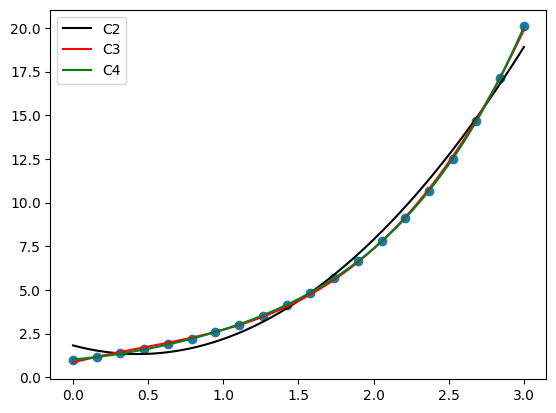

In [8]:
xp=np.linspace(0,3,100)

plt.plot(xp,Polynomial(C2)(xp),'k',label='C2')
plt.plot(xp,Polynomial(C3)(xp),'r',label='C3')
plt.plot(xp,Polynomial(C4)(xp),'g',label='C4')
plt.plot(xp,np.exp(xp),alpha=0.2)
plt.scatter(x,y)
plt.legend()
plt.show()

### Wielomiany Czebyszewa a interpolacja

Okazuje się, że zera wielomianów Czebyszewa, nazywane *węzłami Czebyszewa* są o wiele lepszym zestawem węzłów do interpolacji wielomianowej, niż losowy czy jednostajny wybór węzłów.

Na przedziale $[-1,1]$ węzły Czebyszewa są dane wzorem $$ x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\dots ,n.$$

W dowolnym przedziale $[a,b]$ węzły te mają postać $$x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\dots ,n.$$



### Ćwiczenie 1. (1 pkt)

Porównaj interpolację Lagrange'a funkcji $f(x)=\sin(\pi x)$ na przedziale $[-1,1]$ otrzymaną dla trzech wyborów węzłów interpolacji:
- losowy wybór węzłów
- jednostajny rozkład węzłów na przedziale
- węzły Czebyszewa

Naszkicuj funkcję bazową oraz otrzymane wielomiany interpolacyjne wraz z węzłami interpolacji. Napisz funkcję `ASE(f,W)`, która obliczy przybliżony błąd $\|f-W\|^2$. Oblicz ASE dla każdego wielomianu interpolacyjnego.

In [9]:
from scipy.interpolate import lagrange
from numpy.polynomial import Polynomial

In [10]:
def ASE(function, polynomial, low, high):
    nodes_cnt = 100
    dx = (high - low) / (nodes_cnt - 1)
    ase = 0

    for i in range(nodes_cnt - 1):
        x = low + (i + 0.5) * dx
        f_x = function(x)
        w_x = polynomial(x)
        ase += dx * ((f_x - w_x) ** 2)

    return ase

In [11]:
nodes_cnt = 5
func_sin = np.vectorize(lambda x: np.sin(x * np.pi))
func_sin_label = '$f(x) = sin(\pi x)$'
low = -1
high = 1

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_8971/1916731446.py:3: SyntaxWarning: invalid escape sequence '\p'
  func_sin_label = '$f(x) = sin(\pi x)$'


In [12]:
def plot_lagrange_chebyshev_cmp(x_nodes: np.ndarray, function, low, high, function_label = None):
    deg = len(x_nodes)
    y_nodes = function(x_nodes)

    axes: list[plt.Axes] = None
    _, axes = plt.subplots(1, 2, figsize = (16, 8))

    # funciton to interpolate
    xs = np.linspace(low, high, 100)
    ys = function(xs)

    axes[1].set_title('Interpolation, comparison')
    axes[1].plot(xs, ys, c = 'red', label = function_label, linewidth = 4)
    axes[1].scatter(x_nodes, y_nodes, marker = 'o')

    # chebyshev polynomials
    for i in range(deg):
        poly_factors = [0] * (i + 1)
        poly_factors[-1] = 1
        axes[0].plot(xs, Polynomial(chebyshev.cheb2poly(poly_factors))(xs), label = f'$B{i}$')

    axes[0].set_title("Chebyshev base functions")
    axes[0].legend()

    # # chebyshev fit
    # chebyshev_fit = chebyshev.chebfit(x_nodes, y_nodes, deg = deg)
    # chebyshev_poly = chebyshev.cheb2poly(chebyshev_fit)
    # axes[1].plot(xs, Polynomial(chebyshev_poly)(xs), c = 'purple', label = 'chebyshev')

    # lagrange
    poly = lagrange(x_nodes, y_nodes)
    lagrange_poly = Polynomial(poly.coef[::-1])
    axes[1].plot(xs, lagrange_poly(xs), c = 'blue', label = 'lagrange')

    axes[1].legend()
    plt.show()

    print(f"ASE: {ASE(function, lagrange_poly, low, high)}")

1. Losowy wybór węzłów

In [13]:
x_rand = np.random.uniform(low = -1, high = 1, size = nodes_cnt)

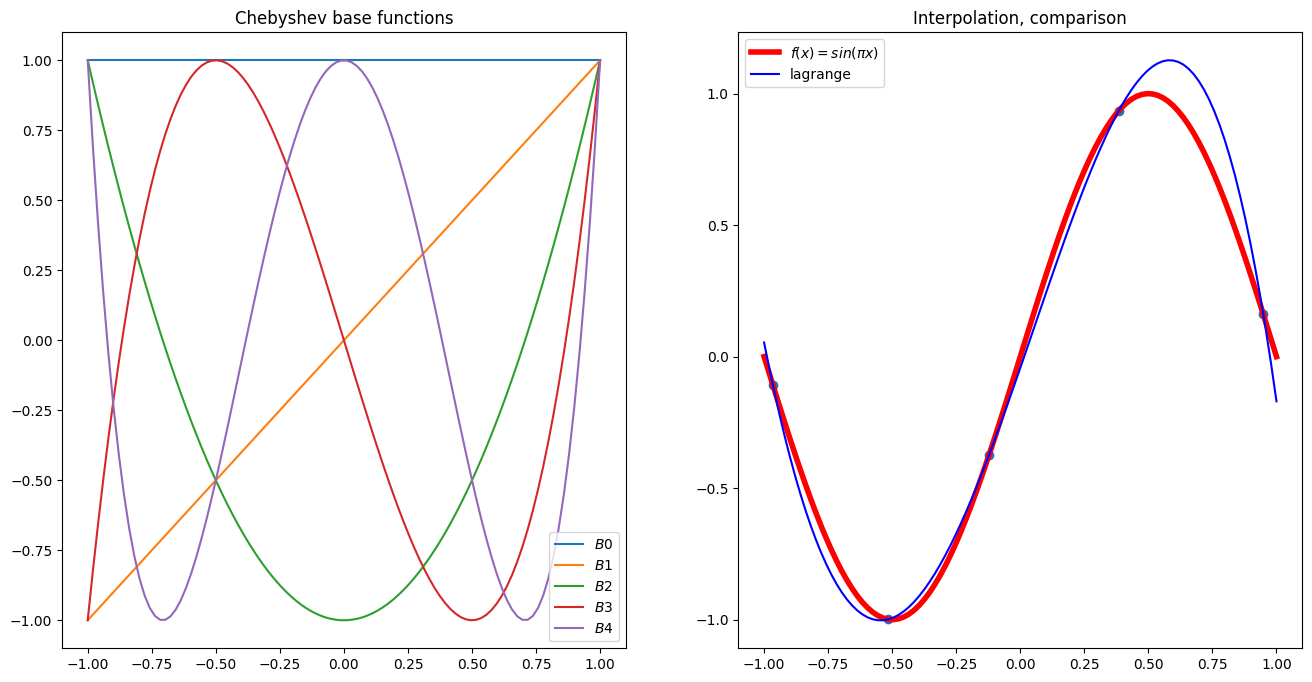

ASE: 0.020376041248536477


In [14]:
plot_lagrange_chebyshev_cmp(x_rand, func_sin, low, high, func_sin_label)

2. Jednostajny rozkład węzłów

In [15]:
x_uniform = np.linspace(low, high, nodes_cnt)

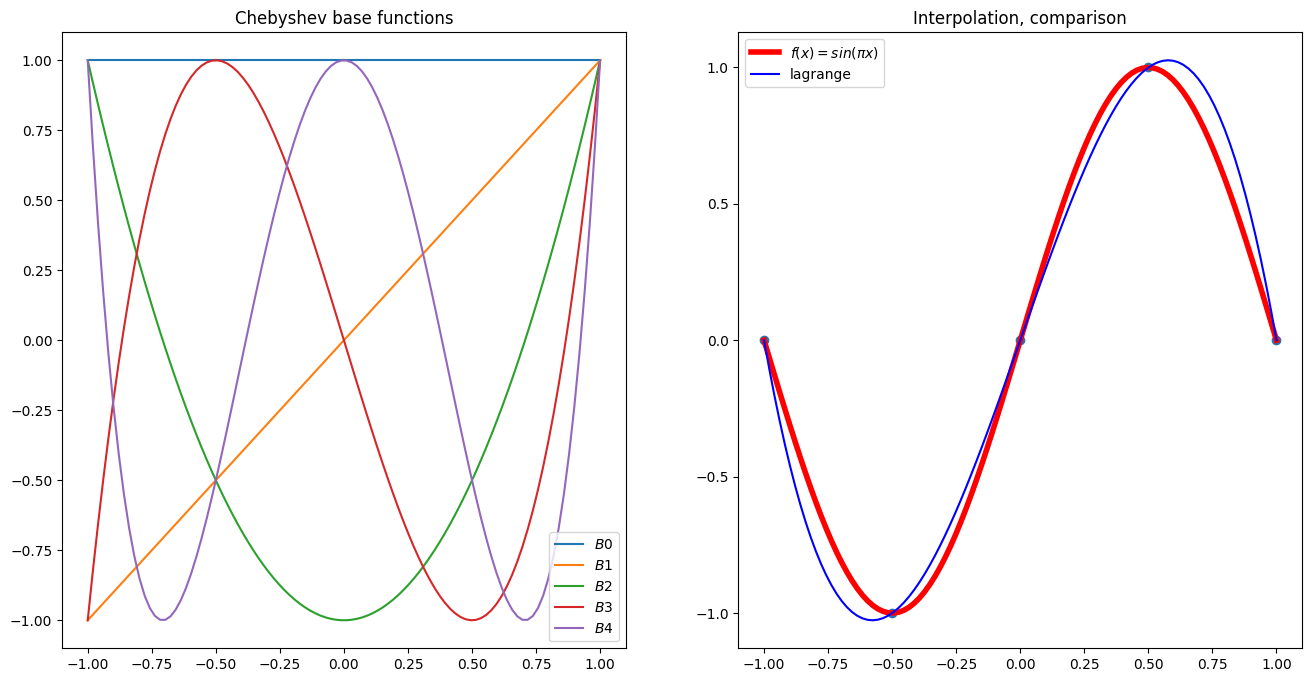

ASE: 0.019499764989068167


In [16]:
plot_lagrange_chebyshev_cmp(x_uniform, func_sin, low, high, func_sin_label)

3. Węzły Czebyszewa

In [17]:
def get_chebyshev_nodes(low, high, nodes_cnt: int) -> np.ndarray:
    nodes = []
    for k in range(1, nodes_cnt + 1):
        x_k = 0.5 * (low + high) + 0.5 * (high - low) * np.cos(np.pi * (2*k - 1) / (2 * nodes_cnt))
        nodes.append(x_k)

    return np.array(nodes)

In [18]:
x_chebyshev = get_chebyshev_nodes(low, high, nodes_cnt)

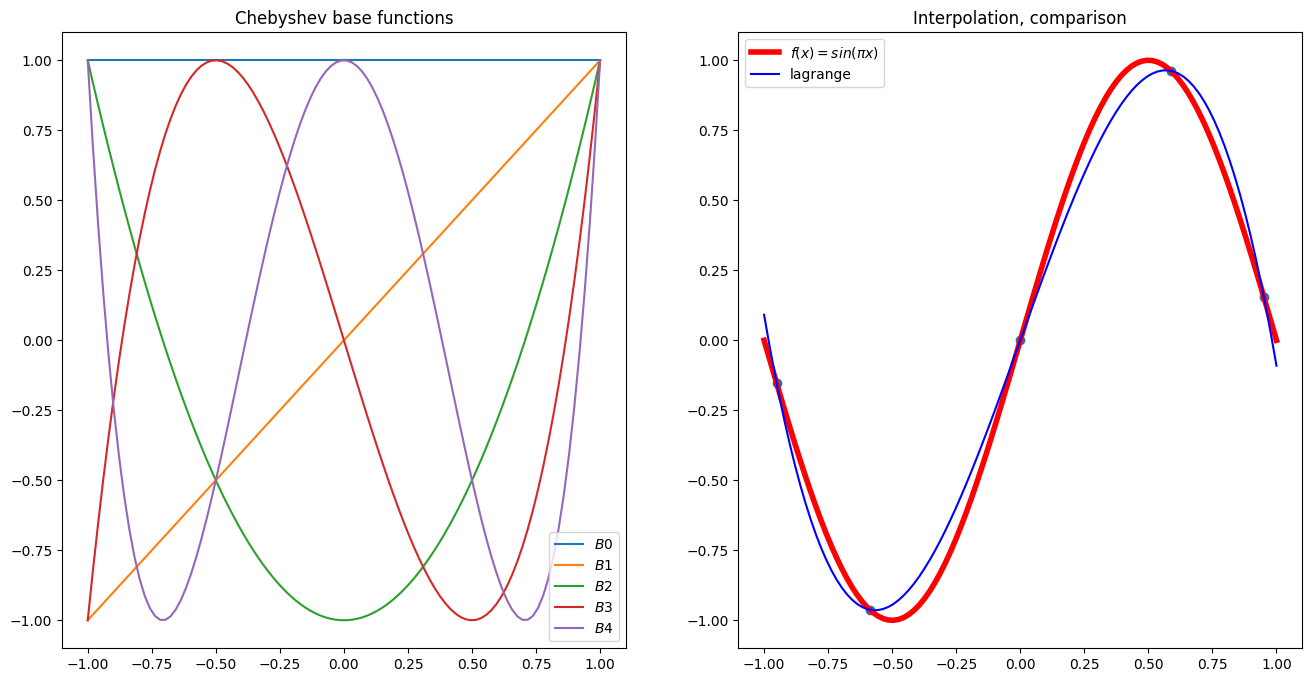

ASE: 0.011814121393425012


In [19]:
plot_lagrange_chebyshev_cmp(x_chebyshev, func_sin, low, high, func_sin_label)

## Aproksymacja Taylora

Podobnie jak w przypadku Czebyszewa aproksymacja Taylora opiera się na rozwinięciu funkcji gładkiej $f(x)$ w *szereg Taylora* w punckie $a$ $$f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots =\sum _{k=0}^{\infty }{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}.$$

Aproksymację Taylora wielomianem stopnia $n$ otrzymujemy zatem jako $$f(x)\approx \sum _{k=0}^{n }{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}.$$

W pythonie aproksymację Taylora znajdziemy w pakiecie scipy `approximate_taylor_polynomial(f, x, degree, scale)`, gdzie `f` to funkcja aproksymowana, `x` to punkt rozwinięcia, `degree` to stopień wielomianu, `scale` to szerokość przedziału, na którym obliczany jest wielomian aproksymacyjny.

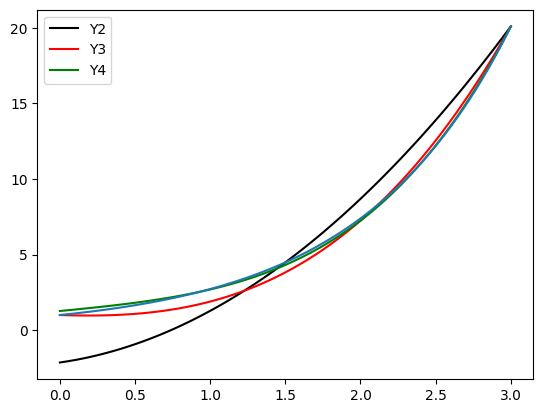

In [20]:
from scipy.interpolate import approximate_taylor_polynomial

Y2=approximate_taylor_polynomial(np.exp,0,2,3)
Y3=approximate_taylor_polynomial(np.exp,0,3,3)
Y4=approximate_taylor_polynomial(np.exp,0,4,3)


xp=np.linspace(0,3,100)

plt.plot(xp,Y2(xp),'k',label='Y2')
plt.plot(xp,Y3(xp),'r',label='Y3')
plt.plot(xp,Y4(xp),'g',label='Y4')
plt.plot(xp,np.exp(xp))
plt.legend()
plt.show()

### Aproksymacja Pade ze współczynników Taylora

Mając współczynniki szeregu Taylora (lub wielomianu aproksymacji Taylora) możemy szybko otrzymać aproksymację wymierną Pade w postaci $\frac{p(x)}{q(x)}$ za pomocą funkcji `scipy.interpolate.pade(an, m, n)`, gdzie `an` to współczynniki Taylora w kolejności od wyrazu wolnego, `m` to zadany stopień licznika `p(x)` a opcjonalne `n` to stopień mianownika `q(x)`.

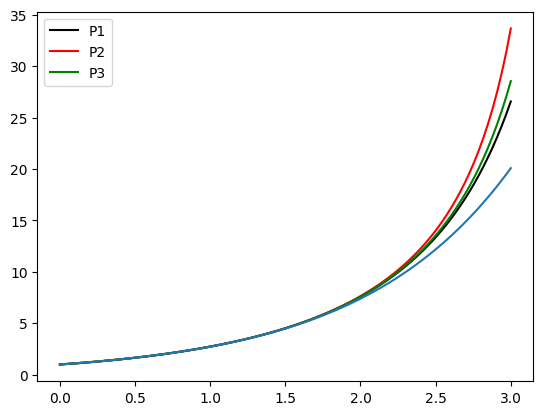

In [21]:
from scipy.interpolate import pade

Y6=approximate_taylor_polynomial(np.exp,0,6,3)

P1=pade(Y6.coefficients[::-1],1)
P2=pade(Y6.coefficients[::-1],2)
P3=pade(Y6.coefficients[::-1],3)

xp=np.linspace(0,3,100)

plt.plot(xp,(P1[0](xp))/(P1[1](xp)),'k',label='P1')
plt.plot(xp,(P2[0](xp))/(P2[1](xp)),'r',label='P2')
plt.plot(xp,(P3[0](xp))/(P3[1](xp)),'g',label='P3')
plt.plot(xp,np.exp(xp))
plt.legend()
plt.show()

### Ćwiczenie 2. (2 pkt)

Porównaj poznane metody aproksymacji na przykładzie funkcji $f(x)=\sin(\pi x)$ na przedziale $[-1,1]$. Dobierz samodzielnie stopień wielomianów. Porównaj otrzymane wielomiany na jednej grafice (wykorzystaj ```plt.subplots()```). Korzystając z funkcji z ćwiczenia 1 oblicz ASE dla każdego z otrzymanych wielomianów aproksymacyjnych.

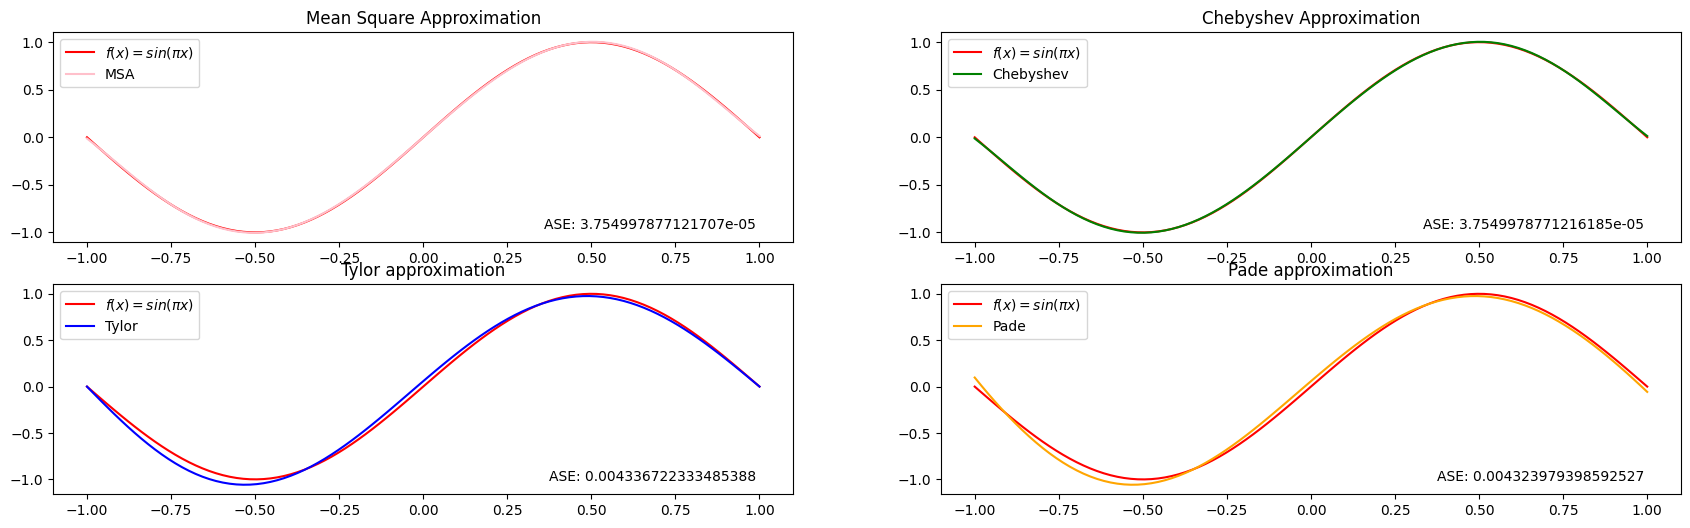

In [22]:
low = -1
high = 1
xs = np.linspace(low, high, 100)
ys = func_sin(xs)

tylor_deg = 10
tylor_poly = approximate_taylor_polynomial(func_sin, 0, 8, high - low)
p, q = pade(tylor_poly.coefficients[::-1], 4)
pade_poly = np.vectorize(lambda x: p(x) / q(x))

axes: list[list[plt.Axes]] = None
_, axes = plt.subplots(2, 2, figsize = (21, 6))

# polynomial mean square approximation
msa_coeff = np.polyfit(xs, ys, 6)
msa_poly = np.poly1d(msa_coeff)
axes[0][0].plot(xs, ys, c = 'red', label = func_sin_label)
axes[0][0].plot(xs, msa_poly(xs), c = 'pink', label = 'MSA')
axes[0][0].set_title("Mean Square Approximation")
axes[0][0].text(0.95, 0.05, f"ASE: {ASE(func_sin, msa_poly, low, high)}",
        transform=axes[0][0].transAxes,
        horizontalalignment='right',
        verticalalignment='bottom')
axes[0][0].legend()

# chebyshev
chebyshev_coeff = chebyshev.chebfit(xs, ys, 6)
chebyshev_poly = Polynomial(chebyshev.cheb2poly(chebyshev_coeff))
axes[0][1].plot(xs, ys, c = 'red', label = func_sin_label)
axes[0][1].plot(xs, chebyshev_poly(xs), c = 'green', label = "Chebyshev")
axes[0][1].set_title("Chebyshev Approximation")
axes[0][1].text(0.95, 0.05, f"ASE: {ASE(func_sin, chebyshev_poly, low, high)}",
        transform=axes[0][1].transAxes,
        horizontalalignment='right',
        verticalalignment='bottom')
axes[0][1].legend()

# tylor
axes[1][0].plot(xs, func_sin(xs), c = 'red', label = func_sin_label)
axes[1][0].plot(xs, tylor_poly(xs), c = 'blue', label = 'Tylor')
axes[1][0].set_title("Tylor approximation")
axes[1][0].text(0.95, 0.05, f"ASE: {ASE(func_sin, tylor_poly, low, high)}",
        transform=axes[1][0].transAxes,
        horizontalalignment='right',
        verticalalignment='bottom')
axes[1][0].legend()


# pade
axes[1][1].plot(xs, ys, c = 'red', label = func_sin_label)
axes[1][1].plot(xs, pade_poly(xs), c = 'orange', label = 'Pade')
axes[1][1].set_title("Pade approximation")
axes[1][1].text(0.95, 0.05, f"ASE: {ASE(func_sin, pade_poly, low, high)}",
        transform=axes[1][1].transAxes,
        horizontalalignment='right',
        verticalalignment='bottom')
axes[1][1].legend()

plt.show()


### Ćwiczenie 3. (2 pkt)

1. Zaimplementuj naiwny algorytm mnożenia macierzy kwadratowych. Dla coraz większych rozmiarów macierzy zmierz czas działania Twojego algorytmu oraz czas działania mnożenia `A.dot(B)` z `numpy`.
2. Dla obydwu algorytmów znajdź dowolną metodą wielomiany aproksymacyjne odpowiednich stopni najlepiej przybliżające krzywą czasu działania w zależności od rozmiaru macierzy.
3. Naszkicuj otrzymane wielomiany wraz z punktami aproksymacji.
4. Sprawdź, czy stopnie otrzymanych wielomianów są zgodne z teoretyczną złożonością badanych algorytmów. 


In [23]:
def custom_dot(mat_a: np.ndarray, mat_b: np.ndarray):
    rows_a, cols_a = mat_a.shape
    rows_b, cols_b = mat_b.shape

    assert cols_a == rows_b, f"Matricies of shapes {mat_a.shape} and {mat_b} can not be multiplied!!!"

    mat_res = np.zeros(shape=(rows_a, cols_b))

    for row in range(rows_a):
        for col in range(cols_b):
            mat_res[row][col] = np.sum(mat_a[row, :] * mat_b[:, col])

    return mat_res

In [24]:
import timeit

In [25]:
def measure_execution_time(function, *data):
    return timeit.timeit(lambda: function(*data), number=1)

In [26]:
np.random.seed(1234)

In [27]:
# mat_sizes = [5 * i for i in range(1, 35 + 1)]
mat_sizes = [25 * i for i in range(1, 7 + 1)]
times_custom = []
times_numpy = []

for mat_size in mat_sizes:
    mat_a = np.random.randint(low = 1, high = 5, size = (mat_size, mat_size))
    mat_b = np.random.randint(low = 1, high = 5, size = (mat_size, mat_size))

    custom_time = measure_execution_time(custom_dot, mat_a, mat_b)
    times_custom.append(custom_time)

    numpy_time = measure_execution_time(lambda: mat_a.dot(mat_b))
    times_numpy.append(numpy_time)

    assert np.array_equal(custom_dot(mat_a, mat_b), mat_a.dot(mat_b))

mat_sizes = np.array(mat_sizes)
times_custom = np.array(times_custom)
times_numpy = np.array(times_numpy)

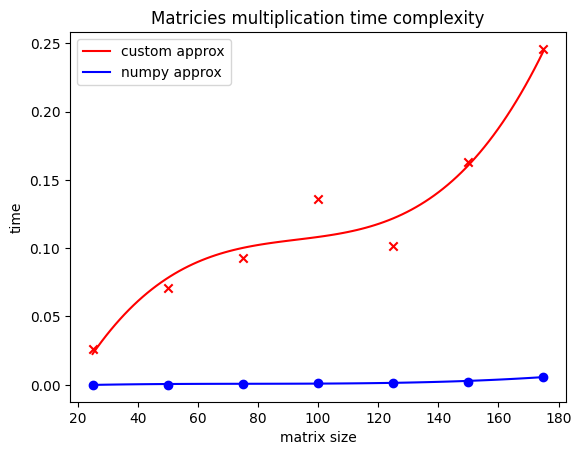

time approximation polynomial degree (custom): 3
time approximation polynomial degree (numpy): 3


In [ ]:
low = np.min(mat_sizes)
high = np.max(mat_sizes)
xs = np.linspace(low, high, 100)

deg = 3

# custom function
custom_poly_fit = chebyshev.chebfit(mat_sizes, times_custom, deg)
custom_poly_fit = Polynomial(chebyshev.cheb2poly(custom_poly_fit))

plt.scatter(mat_sizes, times_custom, c = 'red', marker = 'x')
plt.plot(xs, custom_poly_fit(xs), c = 'red', label = 'custom approx')

# numpy function
numpy_poly_fit = np.poly1d(np.polyfit(mat_sizes, times_numpy, deg))
plt.scatter(mat_sizes, times_numpy, c = 'blue', marker = 'o')
plt.plot(xs, numpy_poly_fit(xs), c = 'blue', label = 'numpy approx')

plt.title("Matricies multiplication time complexity")
plt.xlabel("matrix size")
plt.ylabel("time")
plt.legend()
plt.show()

print(f"time approximation polynomial degree (custom): {custom_poly_fit.degree()}")
print(f"time approximation polynomial degree (numpy): {Polynomial(numpy_poly_fit.coefficients).degree()}")

### Analiza wyników

Teoretyczna złożoność mnożania macierzy kwadratowych wynosi $ O(n^3) $, dlatego też do aproksymacji korzystamy z wielomianów stopnia $ 3 $. Otrzymane dopasowanie wielomianem stopnia 3 zmiania jednak wypukłość, co oznacza, że dla zmierzonych czasów lepszym dopasowaniem mógłby być wielomian stopnia 2.